<a href="https://colab.research.google.com/github/skyaseen005/Avalnche_detection/blob/main/avalanche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("drones images in avalanche", limit=450, output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

In [ ]:
import shutil

shutil.make_archive("dataset", 'zip', "images/drones images in avalanche")

'/content/dataset.zip'

In [ ]:
import os
from PIL import Image
import numpy as np
import cv2

input_path = "/content/images/drones images in avalanche"
output_path = "/content/processed_images_thresholded"
os.makedirs(output_path, exist_ok=True)

target_size = (224, 224)
count = 0

for root, _, files in os.walk(input_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                img = Image.open(os.path.join(root, file)).convert("L")
                img_resized = img.resize(target_size)
                img_array = np.array(img_resized)

                img_denoised = cv2.GaussianBlur(img_array, (5, 5), 0)

                _, img_thresholded = cv2.threshold(img_denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                img_thresholded_normalized = img_thresholded / 255.0
                save_path = os.path.join(output_path, f"img_{count:04d}.jpg")

                Image.fromarray((img_thresholded_normalized * 255).astype(np.uint8)).save(save_path)
                count += 1
            except Exception as e:
                print(f"Error processing {file}: {e}")

print(f"✅ {count} thresholded images processed and saved to: {output_path}")


✅ 443 thresholded images processed and saved to: /content/processed_images_thresholded


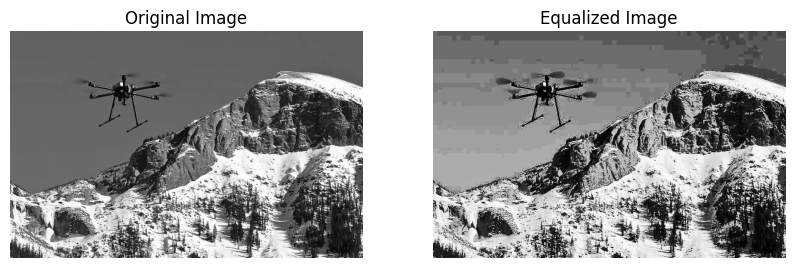

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

input_path = "/content/images/drones images in avalanche/Image_1.jpg"



img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not read image from {input_path}. Please check the file path and ensure the image is not corrupted.")
else:
    img_equalized = cv2.equalizeHist(img)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(img_equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()

Canny edge detection

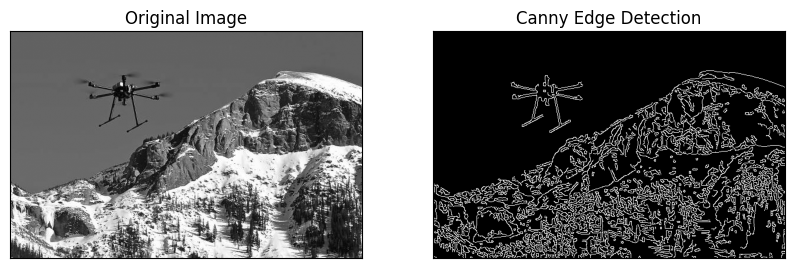

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/images/drones images in avalanche/Image_1.jpg', cv2.IMREAD_GRAYSCALE)

blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

edges = cv2.Canny(blurred_img, 100, 200)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix

ground_truth_path = "/content/processed_images_gray/img_0000.jpg"
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)


image_path = "/content/processed_images_gray/img_0011.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if ground_truth is None:
    print(f"Error: Could not read ground truth image from {ground_truth_path}. Please check the file path and ensure the image is not corrupted.")
elif img is None:
    print(f"Error: Could not read image from {image_path}. Please check the file path and ensure the image is not corrupted.")
else:
    edges = cv2.Canny(img, threshold1=100, threshold2=200)

    ground_truth_binary = np.where(ground_truth > 0, 1, 0)
    edges_binary = np.where(edges > 0, 1, 0)

    ground_truth_flat = ground_truth_binary.flatten()
    edges_flat = edges_binary.flatten()

    tn, fp, fn, tp = confusion_matrix(ground_truth_flat, edges_flat).ravel()


    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall)

    print(precision)
    print(recall)
    print(f_score)

0.9986041317699609
0.2144055944055944
0.42821262489604195


In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix

ground_truth_path = "/content/processed_images_gray/img_0000.jpg"
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)


image_path = "/content/processed_images_gray/img_0011.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if ground_truth is None:
    print(f"Error: Could not read ground truth image from {ground_truth_path}. Please check the file path and ensure the image is not corrupted.")
elif img is None:
    print(f"Error: Could not read image from {image_path}. Please check the file path and ensure the image is not corrupted.")
else:
    edges = cv2.Canny(img, threshold1=100, threshold2=200)


    ground_truth_binary = np.where(ground_truth > 0, 1, 0)
    edges_binary = np.where(edges > 0, 1, 0)

    ground_truth_flat = ground_truth_binary.flatten()
    edges_flat = edges_binary.flatten()

    tn, fp, fn, tp = confusion_matrix(ground_truth_flat, edges_flat).ravel()


    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    print(f"{'Metric':<10} {'Value':<10}")
    print(f"{'-------':<10} {'-----':<10}")
    print(f"{'Precision':<10} {precision:<10.4f}")
    print(f"{'Recall':<10} {recall:<10.4f}")
    print(f"{'F-score':<10} {f_score:<10.4f}")

Metric     Value     
-------    -----     
Precision  0.9986    
Recall     0.2144    
F-score    0.3530    


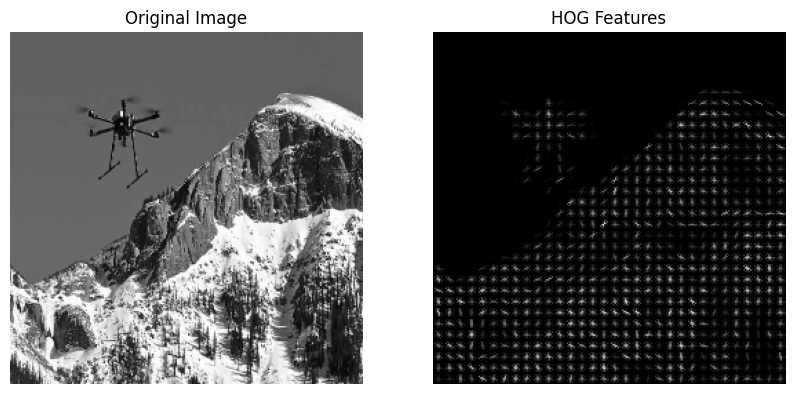

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

img = cv2.imread('/content/images/drones images in avalanche/Image_1.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (256, 256))

features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, channel_axis=None)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.axis('off')

plt.show()


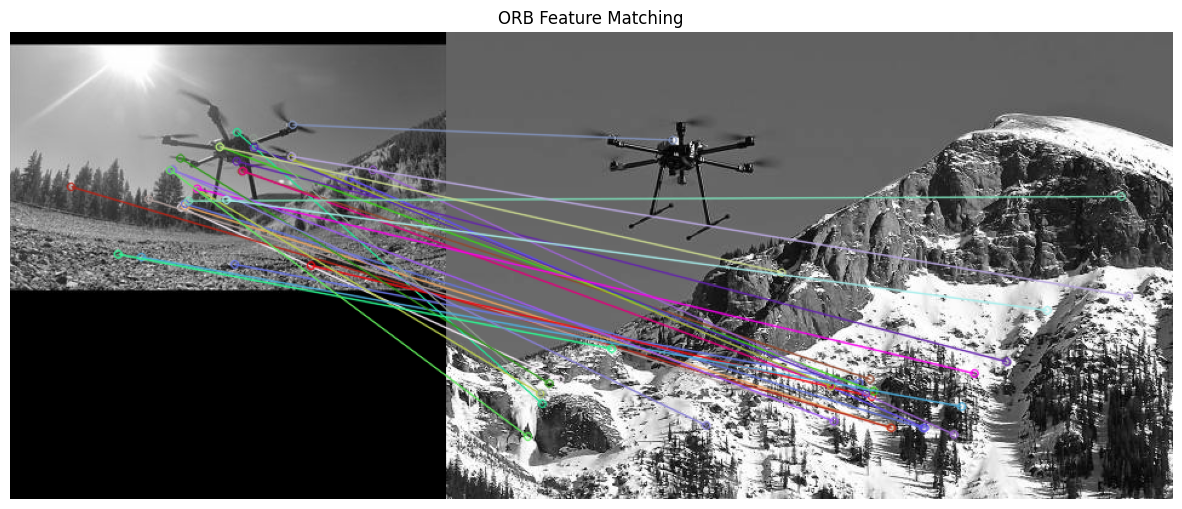

In [ ]:
# Load template and target images
img1 = cv2.imread('/content/images/drones images in avalanche/Image_101.jpg', cv2.IMREAD_GRAYSCALE)  # Template
img2 = cv2.imread('/content/images/drones images in avalanche/Image_1.jpg', cv2.IMREAD_GRAYSCALE)   # Target

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches based on distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 30 matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=2)

# Show the matched keypoints
plt.figure(figsize=(15, 8))
plt.imshow(matched_img)
plt.title('ORB Feature Matching')
plt.axis('off')
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load template and target images
img1 = cv2.imread('/content/images/drones images in avalanche/Image_101.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/images/drones images in avalanche/Image_1.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# You can consider matches with distance < 60 as "good"
good_matches = [m for m in matches if m.distance < 60]

# Accuracy estimate
accuracy_orb = (len(good_matches) / min(len(kp1), len(kp2))) * 100

print(f"🔍 ORB Accuracy Estimate: {accuracy_orb:.2f}%")

# Show matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches[:30], None, flags=2)
plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.title("ORB Good Matches")
plt.axis('off')
plt.show()


SyntaxError: invalid decimal literal (<ipython-input-11-8218cbcc7c83>, line 22)

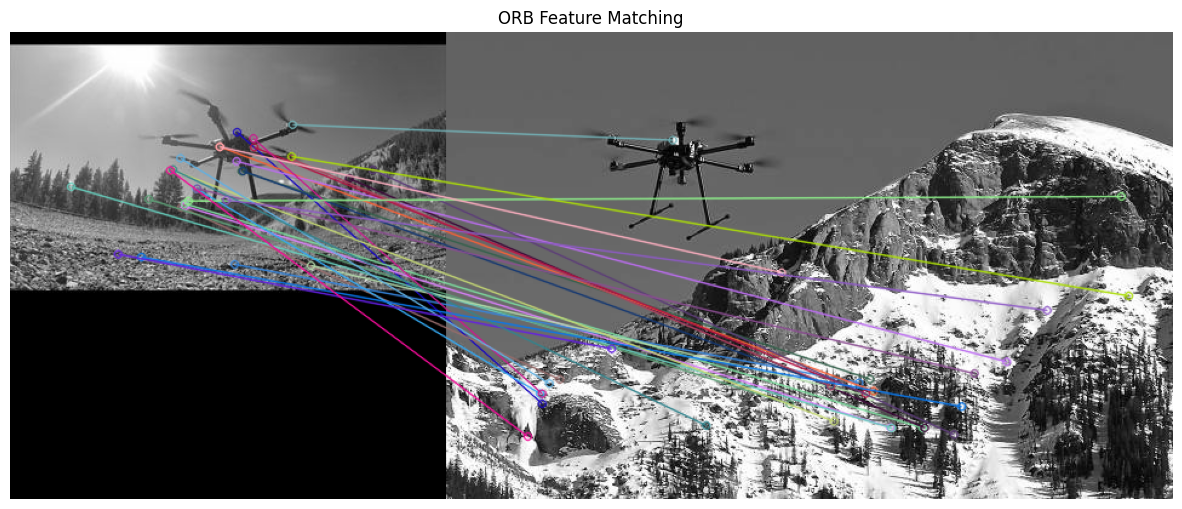

In [ ]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/images/drones images in avalanche/Image_101.jpg', cv2.IMREAD_GRAYSCALE)  # Template
img2 = cv2.imread('/content/images/drones images in avalanche/Image_1.jpg', cv2.IMREAD_GRAYSCALE)   # Target

if img1 is None:
    print("Error: Could not load template image. Please check the file path.")
    exit()
if img2 is None:
    print("Error: Could not load target image. Please check the file path.")
    exit()

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=2)

plt.figure(figsize=(15, 8))
plt.imshow(matched_img)
plt.title('ORB Feature Matching')
plt.axis('off')
plt.show()

In [ ]:
from skimage.feature import hog
import numpy as np
import cv2

# Resize for uniformity
def get_hog_vector(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return features

hog1 = get_hog_vector('/content/images/drones images in avalanche/Image_101.jpg')
hog2 = get_hog_vector('/content/images/drones images in avalanche/Image_1.jpg')

cosine_similarity = np.dot(hog1, hog2) / (np.linalg.norm(hog1) * np.linalg.norm(hog2))
accuracy_hog = cosine_similarity * 100

print(f"📊 HOG Similarity (cosine-based): {accuracy_hog:.2f}%")


📊 HOG Similarity (cosine-based): 65.02%
